In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
dataset = pd.read_csv('salarios.csv')
dataset.head(5)

,Aexperiencia,Salario
0,10.0,42500
1,8.0,36302
2,5.4,35000
3,2.5,18103
4,1.0,15000


In [3]:
dataset.shape

(30, 2)

In [4]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size= 0.2, random_state = 0)

In [6]:
X_train

array([[10. ],
       [ 7. ],
       [ 2. ],
       [ 5.3],
       [ 8. ],
       [ 3. ],
       [ 2. ],
       [ 2. ],
       [ 2.1],
       [ 5. ],
       [ 8. ],
       [ 1. ],
       [ 4. ],
       [ 1. ],
       [ 3. ],
       [ 2. ],
       [10. ],
       [ 6. ],
       [10. ],
       [ 2.5],
       [10. ],
       [ 3.4],
       [ 5. ],
       [ 3. ]])

In [7]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [8]:
LinearRegression(copy_X = True, fit_intercept = True, n_jobs = None, normalize = False)

LinearRegression()

## Datos de entrenamiento

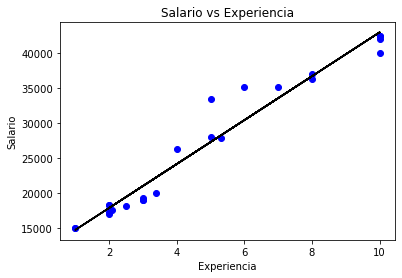

In [9]:
viz_train = plt
viz_train.scatter(X_train, Y_train, color = 'blue')
viz_train.plot(X_train, regressor.predict(X_train), color = 'black')
viz_train.title('Salario vs Experiencia')
viz_train.xlabel('Experiencia')
viz_train.ylabel('Salario')
viz_train.show()

## Datos de prueba

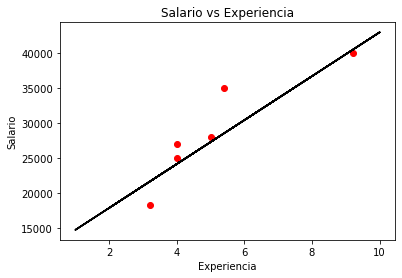

In [10]:
viz_train = plt
viz_train.scatter(X_test, Y_test, color = 'red')
viz_train.plot(X_train, regressor.predict(X_train), color = 'black')
viz_train.title('Salario vs Experiencia')
viz_train.xlabel('Experiencia')
viz_train.ylabel('Salario')
viz_train.show()

In [11]:
regressor.score(X_test, Y_test)

0.7862437374732998

## Reto de la clase

In [14]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

#Defino los paises en lista paises
paises = ['CO', 'BR', 'PE', 'MX']

#Llevo cada elemento de paises a que sea convertido a un numero
le1 = preprocessing.LabelEncoder()
paises_encoded = le1.fit_transform(paises)

#de forma aleatoria creo 30 elementos para el dataset
paises_dataset = [random.choice(paises_encoded) for i in range(len(dataset))]

#paises codificados y en lista pasados al dataset
dataset['pais'] = paises_dataset

Luego aplicando la regresión lienal

In [15]:
# Dividiendo las en columnas en x & y
x = dataset.drop('Salario', axis =1)
y = dataset.iloc[:,1].values

#Dividimos nuestro dataset
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#Invocamos el modelo y creamos el modelo con .fit

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

#Evaluamos performace

print(regressor.score(X_test, Y_test))

0.7888699684110103


La performace obtenida fue de 0.7888699684110103
 Obteniendo los plots

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

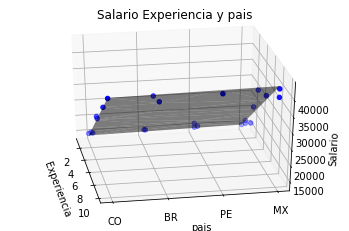

In [18]:
# Ploteamos datos de entrenamiento para ver se realmente el modelo lo hizo bien, se entreno como se debe
fig = plt.figure()
viz_train = fig.add_subplot(111, projection = '3d')
viz_train.scatter(X_train['Aexperiencia'], X_train['pais'], Y_train, color = 'blue')
viz_train.plot_trisurf(X_train['Aexperiencia'], X_train['pais'], regressor.predict(X_train), color= 'black', alpha = 0.5)
viz_train.set_title('Salario Experiencia y pais')
viz_train.set_xlabel('Experiencia')
viz_train.set_ylabel('pais')
viz_train.set_zlabel('Salario')
viz_train.set_yticks(range(len(paises_encoded)))
viz_train.set_yticklabels(le1.inverse_transform(paises_encoded))
viz_train.azim = -10
fig.show

### Resultado para test

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

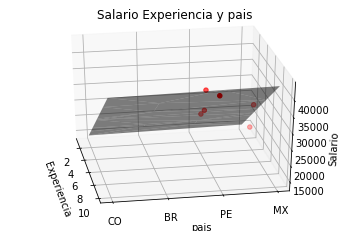

In [21]:
fig = plt.figure()
viz_train = fig.add_subplot(111, projection = '3d')
viz_train.scatter(X_test['Aexperiencia'], X_test['pais'], Y_test, color = 'red')
viz_train.plot_trisurf(X_train['Aexperiencia'], X_train['pais'], regressor.predict(X_train), color= 'black', alpha = 0.5)
viz_train.set_title('Salario Experiencia y pais')
viz_train.set_xlabel('Experiencia')
viz_train.set_ylabel('pais')
viz_train.set_zlabel('Salario')
viz_train.set_yticks(range(len(paises_encoded)))
viz_train.set_yticklabels(le1.inverse_transform(paises_encoded))
viz_train.azim = -10
fig.show